# Diamods_dataset

In [1]:
#Import the labraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load the dataset

In [2]:
df=pd.read_csv("diamonds.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
df.head() # gives the first the 5 lines 

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df['price']

0         326
1         326
2         327
3         334
4         335
         ... 
49995    2757
49996    2757
49997    2757
49998    2757
49999    2757
Name: price, Length: 50000, dtype: int64

In [5]:
df.tail() # gives the last 5 lines

,carat,cut,color,clarity,depth,table,price,x,y,z
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
49999,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [6]:
df.info() # gives the informatioon about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [7]:
df.isnull().sum() # checks the null values in each column

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
df.sample(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
46902,0.23,Very Good,E,VS2,62.4,60.0,400,3.90,3.92,2.44
41394,0.35,Premium,D,SI2,60.8,58.0,522,4.51,4.57,2.76
44750,0.25,Ideal,E,VS2,62.1,57.0,535,4.01,4.05,2.50
1603,0.32,Good,E,SI1,63.4,55.0,561,4.35,4.36,2.76
35444,0.43,Ideal,E,SI1,62.3,57.0,1016,4.82,4.78,2.99
43248,0.53,Ideal,G,VS1,61.5,57.0,1791,5.21,5.23,3.21
5370,0.95,Ideal,I,SI2,61.2,56.0,3918,6.33,6.37,3.89
6332,1.01,Ideal,H,SI2,60.1,60.0,4131,6.54,6.50,3.92
40553,0.53,Ideal,E,SI2,61.4,56.0,1438,5.21,5.25,3.21
26439,0.30,Ideal,F,VS2,63.0,55.0,673,4.29,4.28,2.70


In [9]:
for col in df.columns:
    print(f"Unique values in {col}: {df[col].unique()}") # cheking the unique values

Unique values in carat: [0.23 0.21 0.29 0.31 0.24 0.26 0.22 0.3  0.2  0.32 0.33 0.25 0.35 0.42
 0.38 0.7  0.86 0.71 0.78 0.96 0.73 0.8  0.75 0.74 0.81 0.59 0.9  0.91
 0.61 0.77 0.63 0.76 0.64 0.72 0.79 0.58 1.17 0.83 0.54 0.98 0.52 1.01
 0.53 0.51 1.05 0.55 0.87 1.   0.57 0.82 0.6  1.04 0.93 1.2  0.99 0.34
 0.43 0.36 0.95 0.89 1.02 0.97 0.56 0.85 0.92 1.27 0.84 1.12 1.03 0.62
 0.66 1.22 1.08 0.5  1.19 0.39 0.65 0.68 1.24 1.5  0.27 0.41 1.13 1.06
 0.69 0.88 0.4  1.14 0.94 1.29 1.52 1.16 1.21 1.23 1.09 0.67 1.11 1.1
 1.18 1.15 1.25 1.07 1.28 0.28 0.37 1.31 1.51 1.26 1.39 1.35 1.3  1.32
 1.41 1.36 1.34 1.44 1.54 1.45 1.38 1.33 1.74 1.64 1.47 1.4  1.55 1.95
 2.   1.37 1.83 1.62 1.57 1.69 2.06 1.72 1.66 2.14 1.49 1.46 2.15 1.96
 2.22 1.7  1.85 2.01 2.27 1.68 1.56 1.65 1.82 2.03 1.73 1.59 1.42 1.43
 1.53 2.08 1.58 1.48 1.6  2.49 1.71 2.02 2.07 3.   2.21 2.1  1.91 2.25
 2.17 2.32 2.72 1.61 2.23 2.11 2.05 1.63 2.3  2.31 1.75 2.12 1.77 2.5
 1.67 1.84 2.2  3.01 1.88 2.33 2.04 1.81 1.8  2.34 1.9 

In [10]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
le = LabelEncoder()
# Apply LabelEncoder to all categorical columns
for col in df.columns:
    if df[col].dtype == 'object':  # checks if the column is categorical
        df[col] = le.fit_transform(df[col])




In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  int64  
 2   color    50000 non-null  int64  
 3   clarity  50000 non-null  int64  
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 3.8 MB


In [12]:
# checks the counts values of every columns
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Column: carat
carat
0.30    2412
0.31    2102
1.01    2097
0.70    1843
0.32    1682
        ... 
2.75       1
4.00       1
3.40       1
3.67       1
2.65       1
Name: count, Length: 272, dtype: int64

Column: cut
cut
2    19938
3    12806
4    11204
1     4557
0     1495
Name: count, dtype: int64

Column: color
color
3    10452
1     9085
2     8864
4     7711
0     6224
5     5058
6     2606
Name: count, dtype: int64

Column: clarity
clarity
2    12115
5    11404
3     8519
4     7579
7     4694
6     3369
1     1632
0      688
Name: count, dtype: int64

Column: depth
depth
62.0    2088
61.9    2002
61.8    1916
62.1    1870
62.2    1865
        ... 
52.2       1
53.4       1
72.2       1
72.9       1
54.7       1
Name: count, Length: 181, dtype: int64

Column: table
table
56.0    9126
57.0    9032
58.0    7783
59.0    6119
55.0    5781
        ... 
63.4       1
62.1       1
79.0       1
76.0       1
61.6       1
Name: count, Length: 126, dtype: int64

Column: price
price
802    12

In [13]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

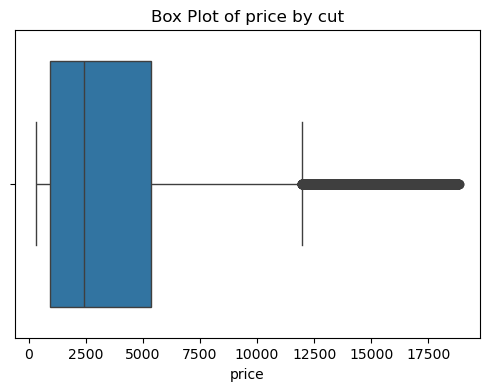

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x='price',data=df)
plt.title('Box Plot of price by cut')
plt.show()


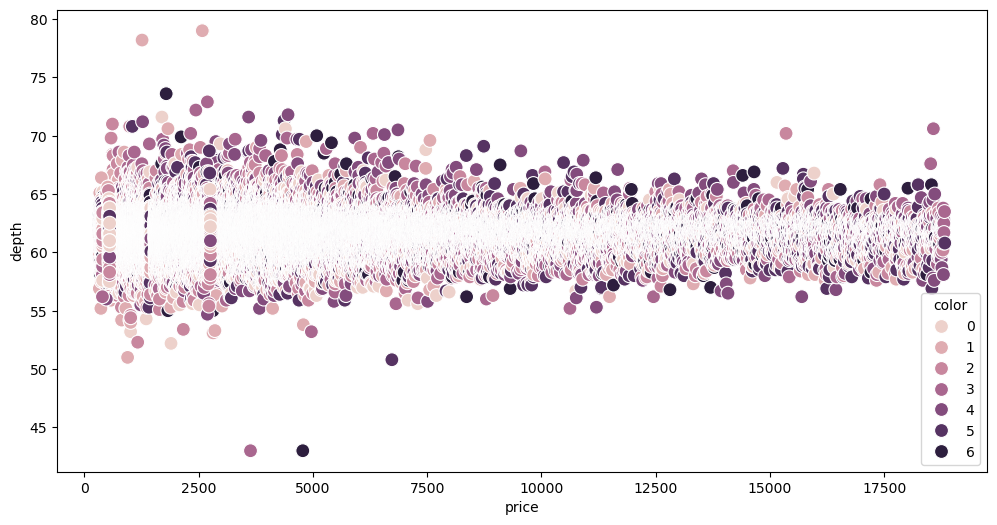

In [15]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='price', y='depth', hue='color', data=df, s=100)

plt.show()

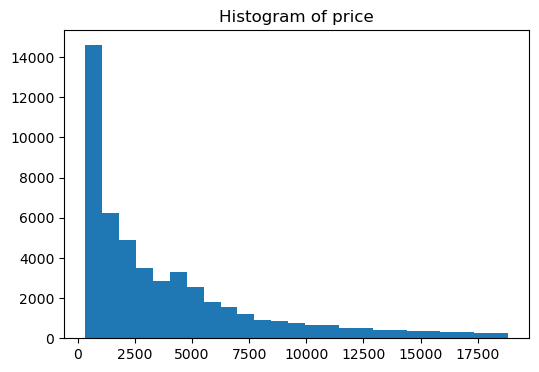

In [16]:
plt.figure(figsize=(6,4))
plt.hist(x='price', bins=25, data=df)
plt.title('Histogram of price')
plt.show()

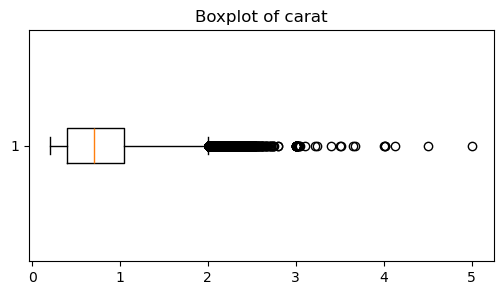

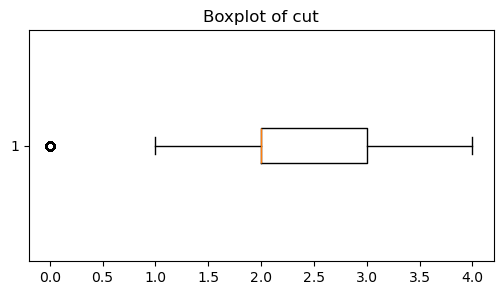

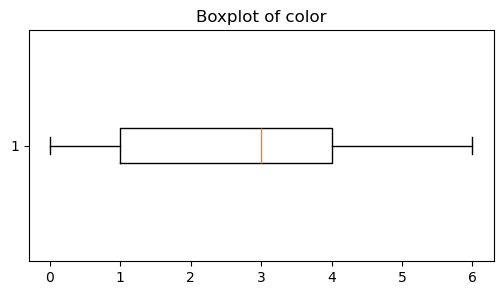

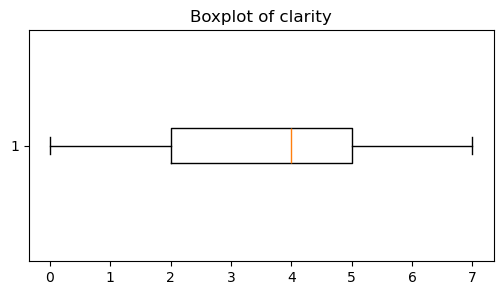

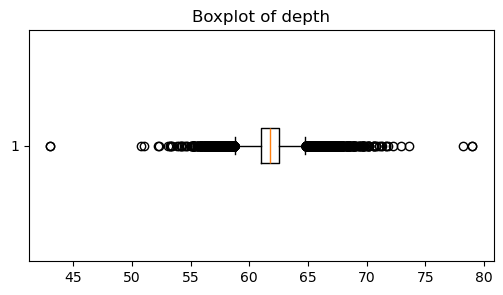

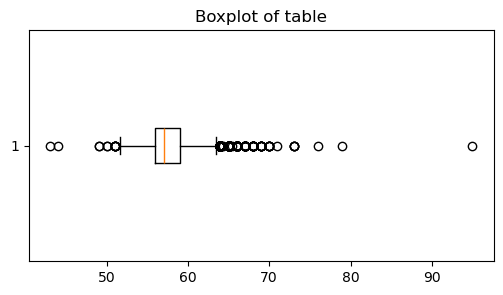

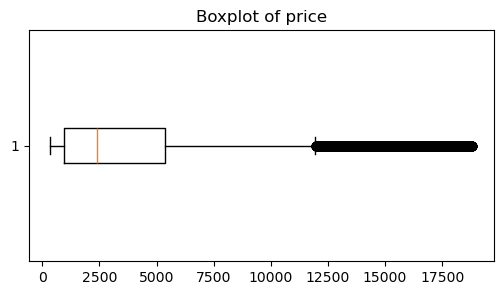

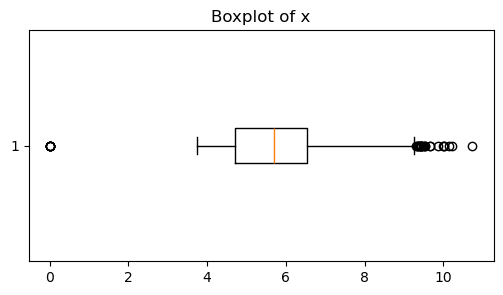

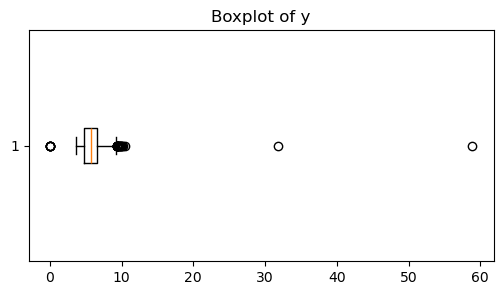

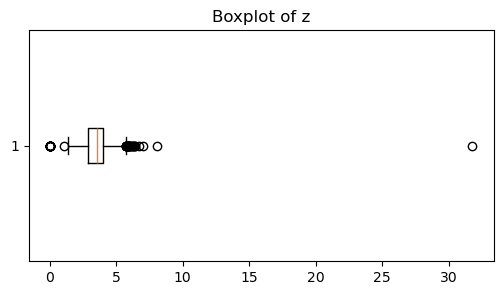

In [17]:
# Select numeric columns except target
numeric_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns ]
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    plt.boxplot(df[col], vert=False)
    plt.title(f"Boxplot of {col}")
    plt.show()


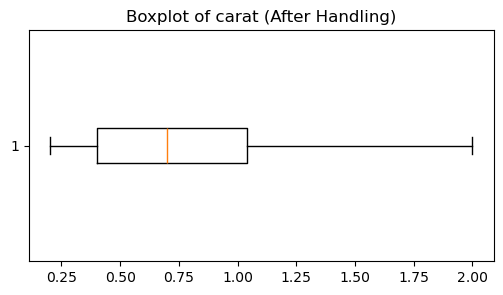

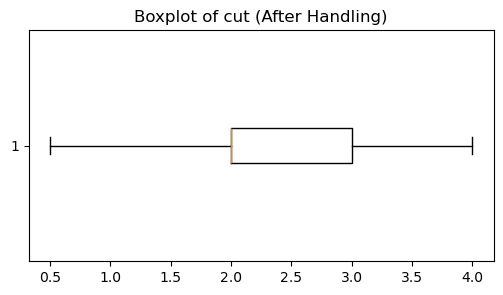

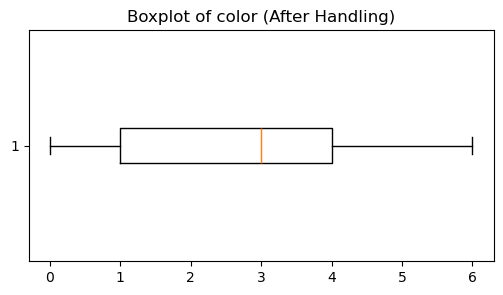

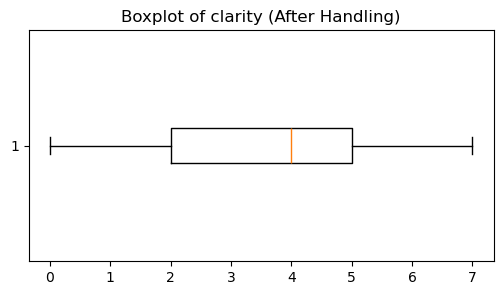

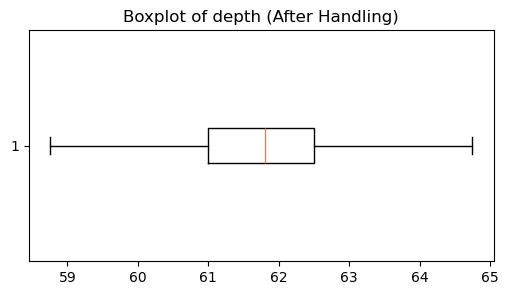

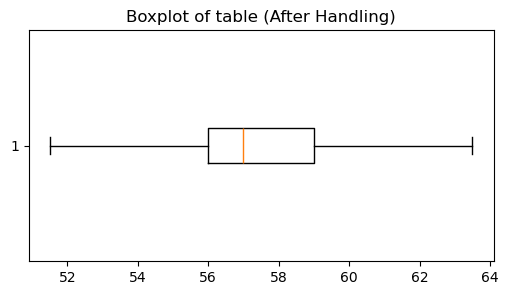

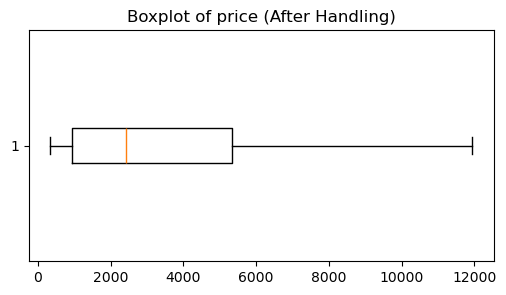

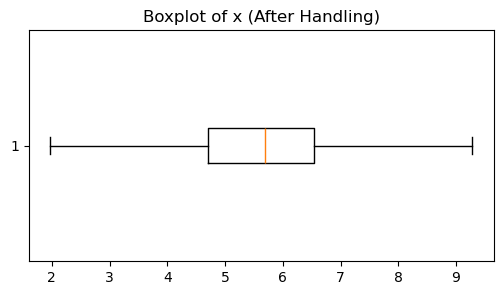

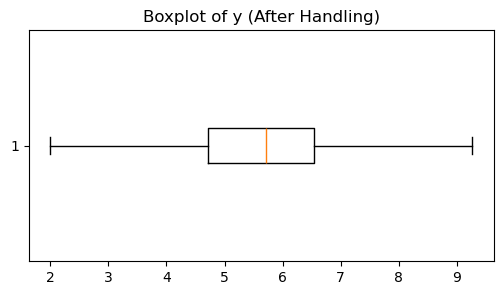

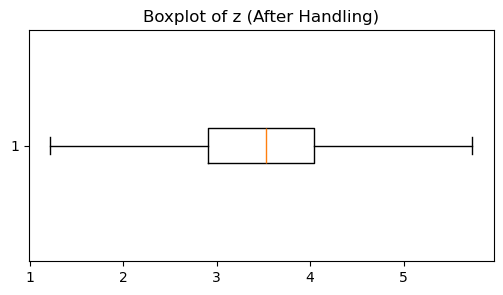

In [18]:

# Select numeric columns except target
numeric_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns ]

# Handle outliers (capping method)
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[col] = df[col].clip(lower_bound, upper_bound)

#Visualize again after handling
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    plt.boxplot(df[col], vert=False)
    plt.title(f"Boxplot of {col} (After Handling)")
    plt.show()


In [19]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [20]:
X=df.drop('price',axis=1)
y=df['price']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
model= DecisionTreeRegressor(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("Decision Tree R2:", r2_score(y_test, y_pred))
rmse = mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred)      

print("RMSE:", rmse)
print("MAE:", mae)

Decision Tree R2: 0.9782732204310263
RMSE: 255156.914125
MAE: 268.21685


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
model1= LinearRegression()
model1.fit(X_train_scaled, y_train)
y_pred1 = model1.predict(X_test_scaled)
print("Linear Regression R2:", r2_score(y_test, y_pred1))
rmse = mean_squared_error(y_test, y_pred1 ) 
mae = mean_absolute_error(y_test, y_pred1)                

print("RMSE:", rmse)
print("MAE:", mae)



Linear Regression R2: 0.9108615156657891
RMSE: 1046832.5745328682
MAE: 712.7741487918208


In [27]:
model2 = RandomForestRegressor(random_state=42, n_estimators=100)
model2.fit(X_train_scaled, y_train)
y_pred2 = model2.predict(X_test_scaled)
print("Random Forest R2:", r2_score(y_test, y_pred2))
print('rmse =',mean_squared_error(y_test, y_pred2 )) 
print('mae =',mean_absolute_error(y_test, y_pred2))                

Random Forest R2: 0.9877321666581063
rmse = 144072.08802299498
mae = 205.51534496785715


In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Parameter grid for RandomizedSearch
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize Random Forest
rf = RandomForestRegressor(random_state=42)

# Randomized Search CV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,        # number of random combinations
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit on training data
random_search.fit(X_train_scaled, y_train)

# Best estimator
best_rf_random = random_search.best_estimator_

# Predict on test set
y_pred_random = best_rf_random.predict(X_test_scaled)

# Metrics
r2 = r2_score(y_test, y_pred_random)
rmse = mean_squared_error(y_test, y_pred_random)
mae = mean_absolute_error(y_test, y_pred_random)

print("RandomizedSearchCV Results:")
print("Best Params:", random_search.best_params_)
print("R2:", r2)
print("RMSE:", rmse)
print("MAE:", mae)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\PMLS\anaconda3\envs\Deeplearning\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
70 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\PMLS\anaconda3\envs\Deeplearning\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\PMLS\anaconda3\envs\Deeplearning\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\PMLS\anaconda3\envs\Deeplearning\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_param

RandomizedSearchCV Results:
Best Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
R2: 0.9865712002272428
RMSE: 157706.35033791518
MAE: 218.02428962182537
